# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={api_key}&q="

In [20]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []
citylist = []

record = 0
set = 1

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    response = requests.get(query_url + city).json()
    
    if record < 50:
        record += 1
    else:
        set += 1
        record = 0
     
    try:
        print(f"Processing Record {record} of Set {set} | {city}")
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        citylist.append(city)
        
        
    except:
        print("City not found. Skipping...")
        pass
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | sorong
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | jaslo
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | marawi
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | lolua
City not found. Skipping...
Processing Record 13 of Set 1 | pochutla
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | maniitsoq
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | kjollefjord
Processing Record 18 of Set 1 | mednogorsk
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | cap malheureux
Processing Record 21 of Set 1 | udachnyy
Processing Record 

Processing Record 37 of Set 4 | madarounfa
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | bagdarin
Processing Record 40 of Set 4 | jieshi
Processing Record 41 of Set 4 | port augusta
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | road town
Processing Record 44 of Set 4 | ascension
Processing Record 45 of Set 4 | bantry
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | istanbul
Processing Record 48 of Set 4 | katsiveli
City not found. Skipping...
Processing Record 49 of Set 4 | bontang
Processing Record 50 of Set 4 | east london
Processing Record 0 of Set 5 | northam
Processing Record 1 of Set 5 | sayabec
City not found. Skipping...
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | ouadda
Processing Record 4 of Set 5 | baoding
Processing Record 5 of Set 5 | palmer
Processing Record 6 of Set 5 | livadiya
Processing Record 7 of Set 5 | brae
Processing Record 8 of Set 5 | a

Processing Record 22 of Set 8 | olavarria
Processing Record 23 of Set 8 | iskateley
Processing Record 24 of Set 8 | ocos
Processing Record 25 of Set 8 | puri
Processing Record 26 of Set 8 | uyovu
Processing Record 27 of Set 8 | hami
Processing Record 28 of Set 8 | kieta
Processing Record 29 of Set 8 | caramay
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | pizarro
Processing Record 32 of Set 8 | tungor
Processing Record 33 of Set 8 | atbasar
Processing Record 34 of Set 8 | gladstone
Processing Record 35 of Set 8 | lookan
Processing Record 36 of Set 8 | hanyang
Processing Record 37 of Set 8 | vallenar
Processing Record 38 of Set 8 | belmonte
Processing Record 39 of Set 8 | vega de alatorre
Processing Record 40 of Set 8 | morgan city
Processing Record 41 of Set 8 | mugumu
Processing Record 42 of Set 8 | choix
Processing Record 43 of Set 8 | airai
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 8 | riaba
City n

Processing Record 4 of Set 12 | pemangkat
Processing Record 5 of Set 12 | sapa
Processing Record 6 of Set 12 | erdemli
Processing Record 7 of Set 12 | ngama
Processing Record 8 of Set 12 | sobolevo
Processing Record 9 of Set 12 | oktyabrskiy
Processing Record 10 of Set 12 | tibati
Processing Record 11 of Set 12 | chimoio
Processing Record 12 of Set 12 | shirokiy
Processing Record 13 of Set 12 | parkes
Processing Record 14 of Set 12 | taos
Processing Record 15 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 16 of Set 12 | erenhot
Processing Record 17 of Set 12 | constantine
Processing Record 18 of Set 12 | kargasok
Processing Record 19 of Set 12 | xochitlan
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | huntsville
Processing Record 22 of Set 12 | uyuni
Processing Record 23 of Set 12 | kathu
Processing Record 24 of Set 12 | ostrovnoy
Processing Record 25 of Set 12 | miramar
Processing Record 26 of Set 12 | bogovarovo
Processing Record 27

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
city_df = pd.DataFrame({"City":citylist})
city_df.to_csv("City Data.csv", index=False, header = True)


In [22]:
weather_df = pd.DataFrame({
    "City" : citylist,
    "Cloudiness" : cloudiness,
    "Country" : country ,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat, 
    "Lng" : lng,
    "Max Temp" : temp_max, 
    "Wind Speed" : wind_speed})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,20,AU,1604787094,61,-42.88,147.33,286.48,4.10
1,hithadhoo,25,MV,1604787070,72,-0.60,73.08,301.75,3.60
2,sorong,100,ID,1604787120,84,-0.88,131.25,300.17,5.26
3,cidreira,32,BR,1604787120,84,-30.18,-50.21,293.10,6.57
4,jaslo,0,PL,1604787120,100,49.75,21.47,280.37,7.60


In [23]:
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [25]:
import datetime
datelist = [] 

for day in date:
    datelist.append(
    datetime.datetime.fromtimestamp(int(day)).strftime('%m/%d/%Y'))

datelist[0:1]

['11/07/2020']

#### Latitude vs. Temperature Plot

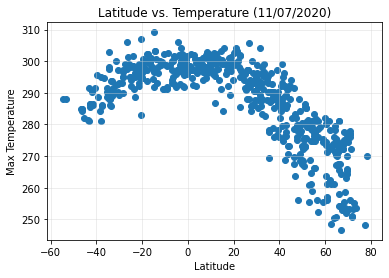

In [33]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title(f'Latitude vs. Temperature ({datelist[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(color='lightgrey', alpha=0.5)
plt.savefig('Latitude_vs_Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

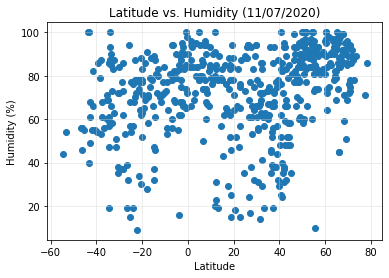

In [32]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title(f'Latitude vs. Humidity ({datelist[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='lightgrey', alpha=0.5)
plt.savefig('latitude_vs_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

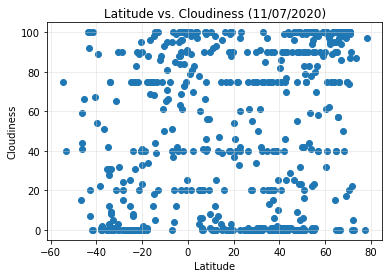

In [31]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.title(f'Latitude vs. Cloudiness ({datelist[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='lightgrey', alpha=0.5)
plt.savefig('Latitude_vs_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

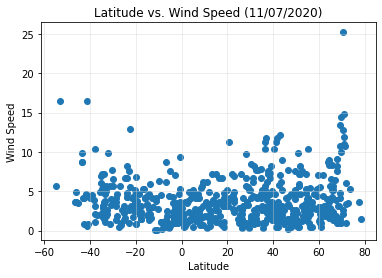

In [34]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title(f'Latitude vs. Wind Speed ({datelist[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='lightgrey', alpha=0.5)
plt.savefig('Latitude_vs_Wind Speed.png')
plt.show()